## **Text Classification by Fine-tuning Language Model**

### **SECTION 1:Data Loading and Exploration**

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00
   ━━━

In [ ]:
!pip install simpletransformers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00
   ━

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import torch
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
uploaded = files.upload()

Saving Extended_NLP_Project_dataset.csv to Extended_NLP_Project_dataset.csv


In [ ]:
df = pd.read_csv('Extended_NLP_Project_dataset.csv')
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Disease'].value_counts())

Dataset Head:
             Disease                                        Description
0  Fungal Infection  Lately, I have been experiencing symptoms such...
1  Fungal Infection  I have noticed persistent painful blisters, pe...
2  Fungal Infection  I have noticed persistent itchy patches, redne...
3  Fungal Infection  I have noticed persistent itchy patches, redne...
4  Fungal Infection  Lately, I have been experiencing symptoms such...

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      1200 non-null   object
 1   Description  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB
None

Missing Values:
 Disease        0
Description    0
dtype: int64

Class Distribution:
 Disease
Fungal Infection           40
Allergy                    40
GERD                       40
Chronic Cholestasis        40
Drug Reactio

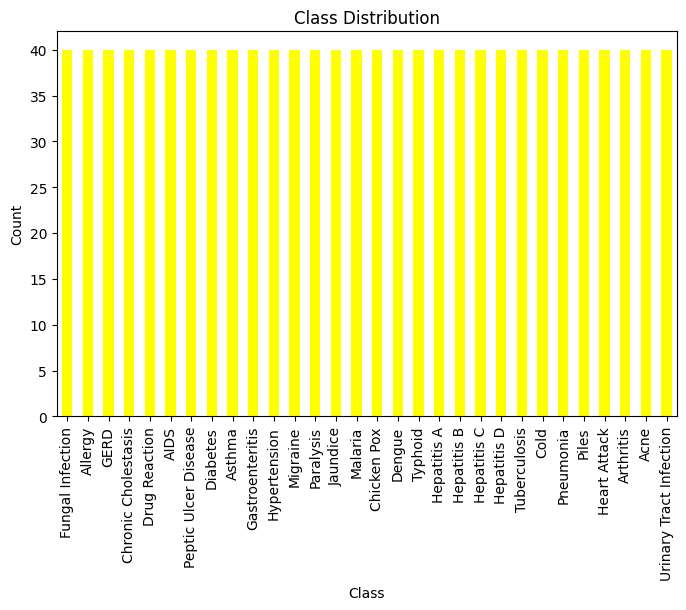

In [ ]:
plt.figure(figsize=(8, 5))
df['Disease'].value_counts().plot(kind='bar', color='yellow')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

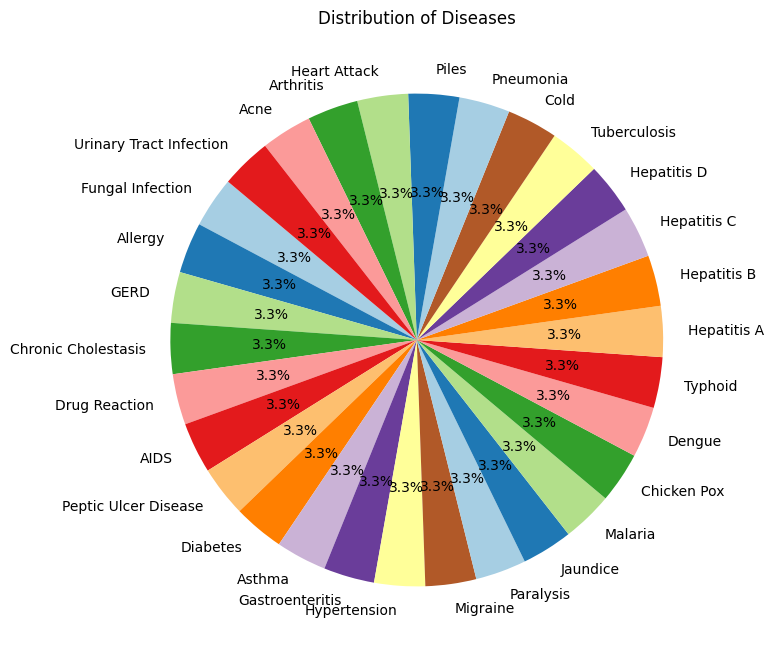

In [ ]:
disease_counts = df['Disease'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Diseases')
plt.show()

In [ ]:
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)
train_df = pd.DataFrame({
    'text': train_df['text'],
    'labels': train_df['label']
})

val_df = pd.DataFrame({
    'text': val_df['text'],
    'labels': val_df['label']
})

### **SECTION 2: Data Preprocessing**

In [ ]:
df = df.dropna(subset=['Disease', 'Description'])
print("Missing values after cleanup:\n", df.isnull().sum())

Missing values after cleanup:
 Disease        0
Description    0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['Disease'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:\n", label_mapping)

Label Mapping:
 {'AIDS': np.int64(0), 'Acne': np.int64(1), 'Allergy': np.int64(2), 'Arthritis': np.int64(3), 'Asthma': np.int64(4), 'Chicken Pox': np.int64(5), 'Chronic Cholestasis': np.int64(6), 'Cold': np.int64(7), 'Dengue': np.int64(8), 'Diabetes': np.int64(9), 'Drug Reaction': np.int64(10), 'Fungal Infection': np.int64(11), 'GERD': np.int64(12), 'Gastroenteritis': np.int64(13), 'Heart Attack': np.int64(14), 'Hepatitis A': np.int64(15), 'Hepatitis B': np.int64(16), 'Hepatitis C': np.int64(17), 'Hepatitis D': np.int64(18), 'Hypertension': np.int64(19), 'Jaundice': np.int64(20), 'Malaria': np.int64(21), 'Migraine': np.int64(22), 'Paralysis': np.int64(23), 'Peptic Ulcer Disease': np.int64(24), 'Piles': np.int64(25), 'Pneumonia': np.int64(26), 'Tuberculosis': np.int64(27), 'Typhoid': np.int64(28), 'Urinary Tract Infection': np.int64(29)}


In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return text

df['cleaned_text'] = df['Description'].apply(clean_text)
print("\nSample Cleaned Text:\n", df[['Description', 'cleaned_text']].head())


Sample Cleaned Text:
                                          Description  \
0  Lately, I have been experiencing symptoms such...   
1  I have noticed persistent painful blisters, pe...   
2  I have noticed persistent itchy patches, redne...   
3  I have noticed persistent itchy patches, redne...   
4  Lately, I have been experiencing symptoms such...   

                                        cleaned_text  
0  lately i have been experiencing symptoms such ...  
1  i have noticed persistent painful blisters pee...  
2  i have noticed persistent itchy patches rednes...  
3  i have noticed persistent itchy patches rednes...  
4  lately i have been experiencing symptoms such ...  


In [ ]:
#train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['labels'])
#rain_df = train_df.reset_index(drop=True)
#val_df = val_df.reset_index(drop=True)
#print("Training Set Size:", len(train_df))
#print("Validation Set Size:", len(val_df))

Training Set Size: 960
Validation Set Size: 240


### SECTION 3: Text Embedding using BERT and RoBER

In [ ]:
train_df = train_df[['cleaned_text', 'labels']]
train_df.columns = ['text', 'labels']
num_classes = df['labels'].nunique()

bert_model = ClassificationModel('bert', 'bert-base-uncased', num_labels=num_classes, use_cuda=False)
roberta_model = ClassificationModel('roberta', 'roberta-base', num_labels=num_classes, use_cuda=False)
distilbert_model = ClassificationModel("distilbert", "distilbert-base-uncased", num_labels=num_classes, use_cuda=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### **SECTION 4: Model Training**

In [ ]:
model_args = ClassificationArgs(
    num_train_epochs=3,
    train_batch_size=4,
    eval_batch_size=4,
    gradient_accumulation_steps=2,
    learning_rate=3e-5,
    max_seq_length=128,
    weight_decay=0.01,
    save_steps=-1,
    overwrite_output_dir=True,
    use_multiprocessing=False
)
bert_model = ClassificationModel("bert", "bert-base-uncased", num_labels=num_classes, args=model_args, use_cuda=False)
print("Training BERT Model")
bert_model.train_model(train_df)
print("BERT Training Completed")

Training BERT Model...


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/240 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/240 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/240 [00:00<?, ?it/s]

BERT Training Completed!


In [ ]:
roberta_model = ClassificationModel("roberta", "roberta-base", num_labels=num_classes, args=model_args, use_cuda=False)
print("Training RoBERTa Model")
roberta_model.train_model(train_df)
print("RoBERTa Training Completed")

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Training RoBERTa Model...


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/240 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/240 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/240 [00:00<?, ?it/s]

RoBERTa Training Completed!


In [ ]:
distilbert_model = ClassificationModel("distilbert", "distilbert-base-uncased", num_labels=num_classes, args=model_args, use_cuda=False)
print("\n Training DistilBERT Model")
distilbert_model.train_model(train_df)
print(" DistilBERT Training Completed")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


🚀 Training DistilBERT Model...


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/120 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/120 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/120 [00:00<?, ?it/s]

✅ DistilBERT Training Completed!


### **SECTION 5: Evaluating on Validation Set**


In [ ]:
from sklearn.metrics import classification_report
val_df = val_df[['Description', 'labels']]
# Evaluate BERT Model
print("\nEvaluating BERT Model...")
result_bert, model_outputs_bert, wrong_predictions_bert = bert_model.eval_model(val_df)
print("BERT Model Evaluation Results:", result_bert)

# Evaluate RoBERTa Model
print("\nEvaluating RoBERTa Model...")
result_roberta, model_outputs_roberta, wrong_predictions_roberta = roberta_model.eval_model(val_df)
print("RoBERTa Model Evaluation Results:", result_roberta)

# Display detailed classification report
true_labels = val_df["labels"].tolist()
pred_labels_bert = model_outputs_bert.argmax(axis=1)
pred_labels_roberta = model_outputs_roberta.argmax(axis=1)

print("\nBERT Classification Report:")
print(classification_report(true_labels, pred_labels_bert))

print("\nRoBERTa Classification Report:")
print(classification_report(true_labels, pred_labels_roberta))



Evaluating BERT Model...


/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

BERT Model Evaluation Results: {'mcc': np.float64(0.7236866301932118), 'eval_loss': 2.202950417995453}

Evaluating RoBERTa Model...


/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

RoBERTa Model Evaluation Results: {'mcc': np.float64(0.9830411443754369), 'eval_loss': 0.4614776074886322}

BERT Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       1.00      1.00      1.00         8
           2       0.00      0.00      0.00         8
           3       1.00      0.75      0.86         8
           4       1.00      0.75      0.86         8
           5       0.00      0.00      0.00         8
           6       0.73      1.00      0.84         8
           7       0.23      1.00      0.37         8
           8       1.00      0.75      0.86         8
           9       1.00      1.00      1.00         8
          10       1.00      0.50      0.67         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SECTION 6: Saving the Best Model

In [ ]:
bert_model.model.save_pretrained("bert_model")
bert_model.tokenizer.save_pretrained("bert_model")
print("BERT model saved manually!")

roberta_model.model.save_pretrained("roberta_model")
roberta_model.tokenizer.save_pretrained("roberta_model")
print("RoBERTa model saved manually!")

BERT model saved manually!
RoBERTa model saved manually!


###SECTION 7: Prediction on Real-World Input

### Prediction Using BERT Model

In [ ]:
bert_model = ClassificationModel('bert', 'bert_model', use_cuda=False)

def predict_disease(description):
    cleaned_text = clean_text(description)
    predictions, raw_outputs = roberta_model.predict([cleaned_text])
    predicted_disease = label_encoder.inverse_transform([predictions[0]])[0]

    return predicted_disease

test_description = input("Enter the description: ")
predicted_disease = predict_disease( test_description)
print(f"\nSymptoms: {test_description}")
print(f"Predicted Disease: {predicted_disease}\n")

Enter the description: I have noticed persistent heartburn, acid reflux, and chest pain for the past few weeks. It has been affecting my daily routine, making it difficult to sleep peacefully. Sometimes, I also experience dizziness. The symptoms seem to fluctuate, but overall, they have been getting worse. Seeking medical attention seems necessary at this point.


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Symptoms: I have noticed persistent heartburn, acid reflux, and chest pain for the past few weeks. It has been affecting my daily routine, making it difficult to sleep peacefully. Sometimes, I also experience dizziness. The symptoms seem to fluctuate, but overall, they have been getting worse. Seeking medical attention seems necessary at this point.
🩺 Predicted Disease: GERD



### **Prediction Using RoBERTa Model**

In [ ]:
roberta_model= ClassificationModel('bert', 'bert_model', use_cuda=False)

def predict_disease1(description):

    cleaned_text = clean_text(description)
    predictions, raw_outputs = bert_model.predict([cleaned_text])
    predicted_disease = label_encoder.inverse_transform([predictions[0]])[0]

    return predicted_disease

test_description = input("Enter the description: ")
predicted_disease = predict_disease1( test_description)
print(f"\nSymptoms: {test_description}")
print(f"Predicted Disease: {predicted_disease}\n")

Enter the description: For the past few days, I have been suffering from rashes, swelling, and fever. The discomfort is making it difficult for me to sleep peacefully. Along with that, I feel tired, which adds to the struggle. I have tried some home remedies, but the symptoms persist. It's becoming clear that I need medical advice.


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Symptoms: For the past few days, I have been suffering from rashes, swelling, and fever. The discomfort is making it difficult for me to sleep peacefully. Along with that, I feel tired, which adds to the struggle. I have tried some home remedies, but the symptoms persist. It's becoming clear that I need medical advice.
Predicted Disease: Drug Reaction

